======> https://news.nate.com/section?mid=n0600 IT/과학 뉴스 <======
https://news.nate.com/view/20250409n24253?mid=n0600
할아버지 또 "나 때는 말이야"…다 들어주는 中 요양원 귀요미 정체


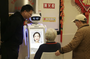

https://news.nate.com/view/20250409n14694?mid=n0600
"암 입니다"…병 진단도 AI가 인간을 능가했다


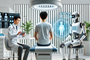

https://news.nate.com/view/20250409n09259?mid=n0600
"캐릭터 얻어맞아 우울증"…중국 게이머, 게임사 상대 소송


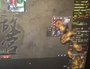

https://news.nate.com/view/20250409n04317?mid=n0600
"야간 근무자 심혈관질환 위험, 낮에만 식사하면 낮출 수 있어"


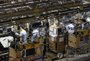

https://news.nate.com/view/20250409n04720?mid=n0600
"아이폰 곧 300만원" 미국서 패닉바잉…애플 시총 1150조 녹았다


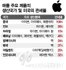

In [2]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from IPython.display import Image, display

section_dict = {'최신뉴스':'n0100', '정치':'n0200', '경제':'n0300',\
                '사회':'n0400','세계':'n0500', 'IT/과학':'n0600'}

def print_news(section_name):
    section = section_dict.get(section_name)
    if section is None:
        print("요청하신 Key가 없습니다.")
    else:
        if section == 'n0100':
            url = f'https://news.nate.com/recent?mid={section}'
        else:
            url = f'https://news.nate.com/section?mid={section}'
        print(f'======> {url} {section_name} 뉴스 <======')

        req_header = {
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36'
        }

        res = requests.get(url, headers = req_header)
        if res.ok:
            html = res.text
            soup = BeautifulSoup(html, 'html.parser')
            for d_tag in soup.select('div.mlt01'):
                a_tag = d_tag.find('a')
                link = a_tag['href']

                h2_tag = d_tag.select_one('span.tb h2.tit')
                title = h2_tag.text
                print(urljoin(url, link))
                print(title)
                i_tag = d_tag.find('img')
                if i_tag:
                    i_link = i_tag['src']
                    image_url = urljoin(url, i_link)
                    display(Image(image_url))
        else:
            print(f'에러 코드 = {res.status_code}')

print_news('IT/과학')